In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [68]:
df = pd.read_csv('../drinking_water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [69]:
columns_to_extract = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
train_labels = df['Potability']

In [70]:
train_features = df[columns_to_extract]
train_features.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.3, random_state=2)

In [72]:
from sklearn.ensemble import RandomForestClassifier

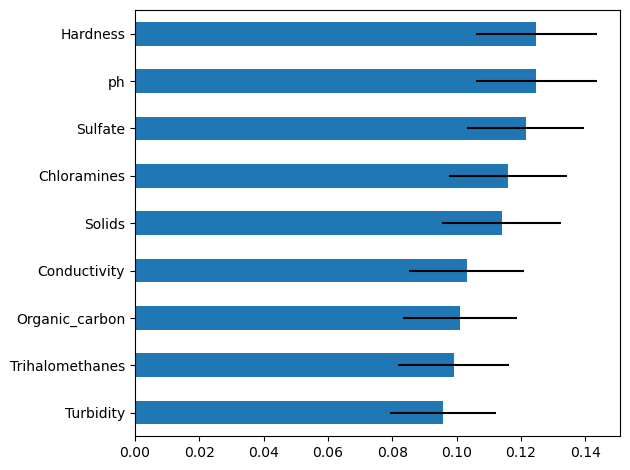

(2293, 9) (983, 9) (2293,) (983,)


In [73]:
rf = RandomForestClassifier(n_estimators=1000, random_state=2)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df_balanced = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df_balanced = df_balanced.sort_values('importance')

select_features = df_balanced[df_balanced.importance >= 0.05].feature

ax = df_balanced.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.tight_layout()
plt.show()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
# Normalización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [111]:
model.compile(
    optimizer='adagrad',
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [112]:
y_pred = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32)

Epoch 1/10
72/72 [==============================] - 2s 12ms/step - loss: 0.6894 - accuracy: 0.5595 - val_loss: 0.6866 - val_accuracy: 0.5615
Epoch 2/10
72/72 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5822 - val_loss: 0.6835 - val_accuracy: 0.5849
Epoch 3/10
72/72 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.5931 - val_loss: 0.6815 - val_accuracy: 0.5931
Epoch 4/10
72/72 [==============================] - 0s 5ms/step - loss: 0.6802 - accuracy: 0.5975 - val_loss: 0.6800 - val_accuracy: 0.5921
Epoch 5/10
72/72 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5983 - val_loss: 0.6789 - val_accuracy: 0.5992
Epoch 6/10
72/72 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.6005 - val_loss: 0.6779 - val_accuracy: 0.6022
Epoch 7/10
72/72 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5997 - val_loss: 0.6771 - val_accuracy: 0.6053
Epoch 8/10
72/72 [=

In [113]:
y_pred_probabilities = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
classification_rep = classification_report(y_test, y_pred_classes)
print(classification_rep)

31/31 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       599
           1       0.00      0.00      0.00       384

    accuracy                           0.61       983
   macro avg       0.30      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Segunda:

         0.0       0.71      0.13      0.21       326
         1.0       0.53      0.95      0.68       340

    accuracy                           0.55       666
   macro avg       0.62      0.54      0.45       666
weighted avg       0.62      0.55      0.45       666

In [102]:
train_acc = y_pred.history['accuracy']
val_acc = y_pred.history['val_accuracy']
train_loss = y_pred.history['loss']
val_loss = y_pred.history['val_loss']

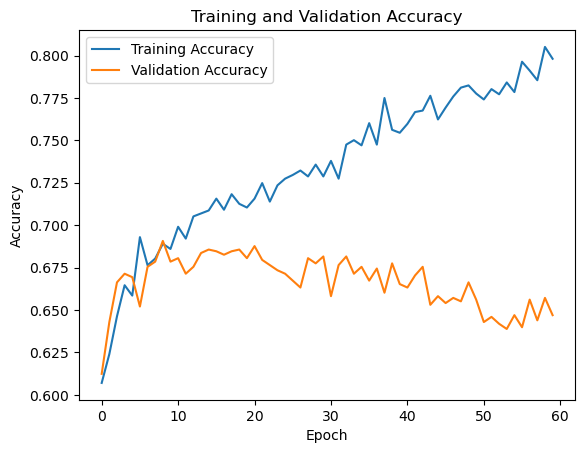

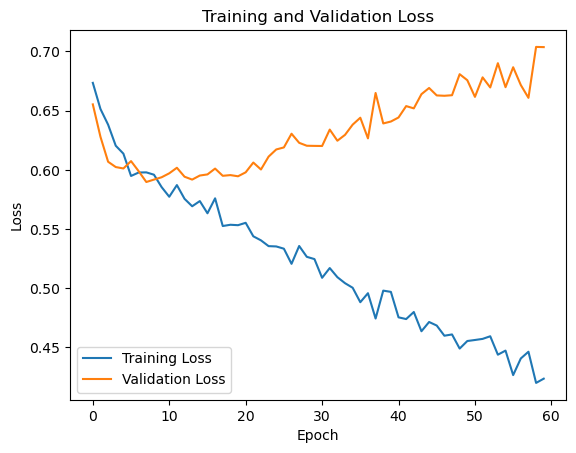

In [103]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()